In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset.csv')

In [78]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [79]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [80]:
columns = ["GENDER"]
df1 = df.drop(columns=columns) 
df_new = pd.get_dummies(df["GENDER"], dtype=int)
df1 = pd.concat([df1, df_new], axis=1)
df1.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,F,M
0,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO,0,1
1,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO,1,0
2,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES,1,0
3,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES,0,1
4,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO,1,0


In [81]:
y = pd.Series(np.where(df1.LUNG_CANCER.values == 'YES', 1, 0), df1.index)

In [82]:
X = df1.drop(columns=['LUNG_CANCER'])

<Axes: >

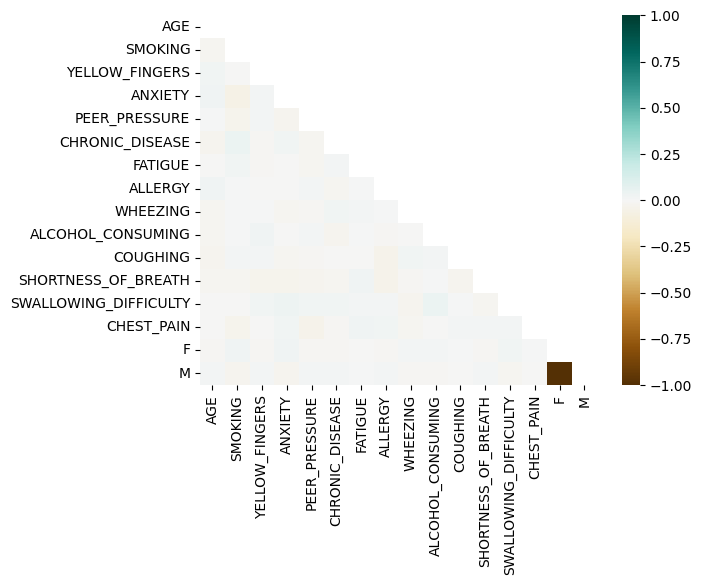

In [83]:
import seaborn as sns
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))

sns.heatmap(X.corr(), cmap='BrBG', mask=mask,vmin=-1, vmax=1,)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2400, 16) (600, 16) (2400,) (600,)


In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [87]:
#y_test = y_test.values.reshape(-1,1)
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true = y_test, y_pred=y_pred)
acc

0.52